In [600]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [601]:
# THIS BIT OF CODE IS ESSENTIAL TO READ THE DATASET
data = pd.read_csv(r"D:\Retail-Store-Inventory-Forecasting-Data-Analysis\Retail_Store_Data\retail_store_inventory.csv")

In [602]:
# THIS BIT OF CODE IS ESSENTIAL TO CREATE A COPY OF THE ACTUAL CODE BECAUSE ANY CHANGES IN THIS DATAFRAME WILL NOT AFFECT THE ACTUAL DATASET
df = data.copy()

In [603]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE SHAPE OF OUR DATAFRAME(ACTUAL DATASET BEFORE CONVERSION)
print("No of Rows in this dataset - ", len(df))
print("-" * 50)
print("No of Columns in this dataset - ", df.shape[1])
print("-" * 50)
print("Size of this dataset - ", df.shape)

No of Rows in this dataset -  73100
--------------------------------------------------
No of Columns in this dataset -  15
--------------------------------------------------
Size of this dataset -  (73100, 15)


In [604]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF NULL VALUES FROM EVERY ATTRIBUTE
print(df.isna().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [605]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF UNIQUE VALUES FROM EVERY ATTRIBUTE
print(df.nunique())

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64


In [606]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE RANGE OF YEARS WE ARE DEALING WITH
a = df['Date']
print(a.head(10))
print("-" * 30)
print(a.tail(10))

0    1/1/2022
1    1/1/2022
2    1/1/2022
3    1/1/2022
4    1/1/2022
5    1/1/2022
6    1/1/2022
7    1/1/2022
8    1/1/2022
9    1/1/2022
Name: Date, dtype: object
------------------------------
73090    1/1/2024
73091    1/1/2024
73092    1/1/2024
73093    1/1/2024
73094    1/1/2024
73095    1/1/2024
73096    1/1/2024
73097    1/1/2024
73098    1/1/2024
73099    1/1/2024
Name: Date, dtype: object


In [607]:
# CREATING A NEW COLUMN - 'sales'
df['sales'] = df['Units Sold'] * df['Price']

In [608]:
print(df['sales'])

0        4,254.50
1        9,451.50
2        1,819.35
3        1,995.92
4        1,030.96
           ...   
73095      589.84
73096    4,211.07
73097      399.96
73098   14,028.96
73099      470.34
Name: sales, Length: 73100, dtype: float64


In [609]:
# BR1 starts here
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'date' with the actual column name
# Extract month
df['month'] = df['Date'].dt.month
# Extract year for YoY grouping
df['year'] = df['Date'].dt.year

In [610]:
# Rebuild your group and keep raw sales
yearly_sales = df.groupby('year', as_index=False)['sales'].sum()

# Compute YoY growth
yearly_sales['yoy_growth_%'] = yearly_sales['sales'].pct_change() * 100

# Format nicely (for display only)
yearly_sales['sales_formatted'] = yearly_sales['sales'].apply(lambda x: f"{x:,.2f}")
yearly_sales['yoy_growth_formatted'] = yearly_sales['yoy_growth_%'].apply(lambda x: f"{x:,.2f}%" if pd.notnull(x) else "-")
# Filter out 2024 to focus on complete years
filtered_sales = yearly_sales[yearly_sales['year'] < 2024]
yearly_sales

,year,sales,yoy_growth_%,sales_formatted,yoy_growth_formatted
0,2022,"276,037,316.73",NaN,"276,037,316.73",-
1,2023,"273,503,443.82",-0.92,"273,503,443.82",-0.92%
2,2024,"688,124.36",-99.75,"688,124.36",-99.75%


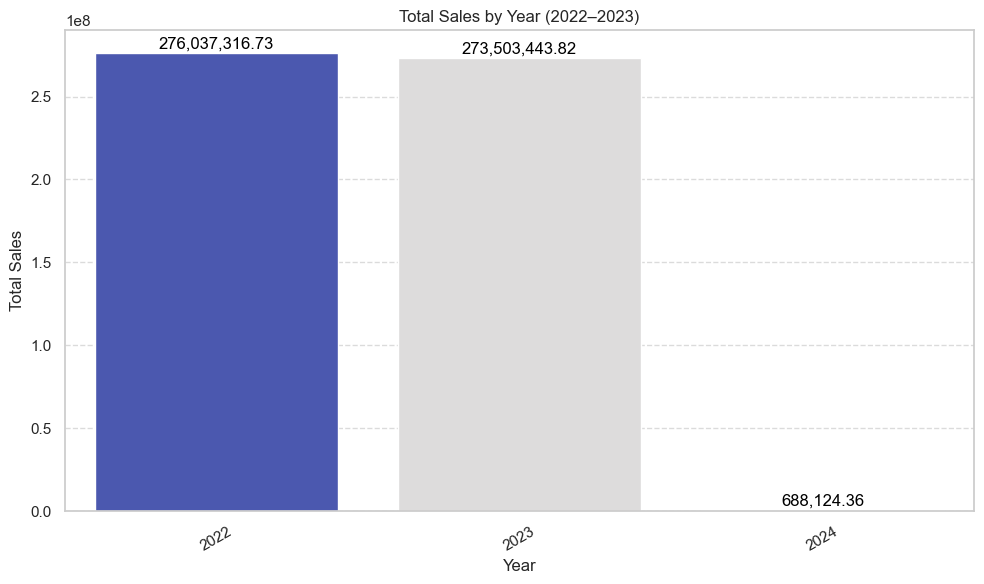

In [611]:
# BR1 visualization
# let's visualize year-over-year sales and growth percentage
plt.figure(figsize=(10,6))
ax = sns.barplot(data=yearly_sales, x='year', y='sales',hue='year', palette='coolwarm',legend=False)

# Set plot titles and labels using the Axes object
ax.set_title('Total Sales by Year (2022–2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.tick_params(axis='x', rotation=30)

# Annotate each bar
for conatiner in ax.containers:
    for bar in conatiner:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f'{height:,.2f}',  # format with commas and 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12,
                color='black'
            )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('br1-0.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()# repeat for BR2, BR3, etc.

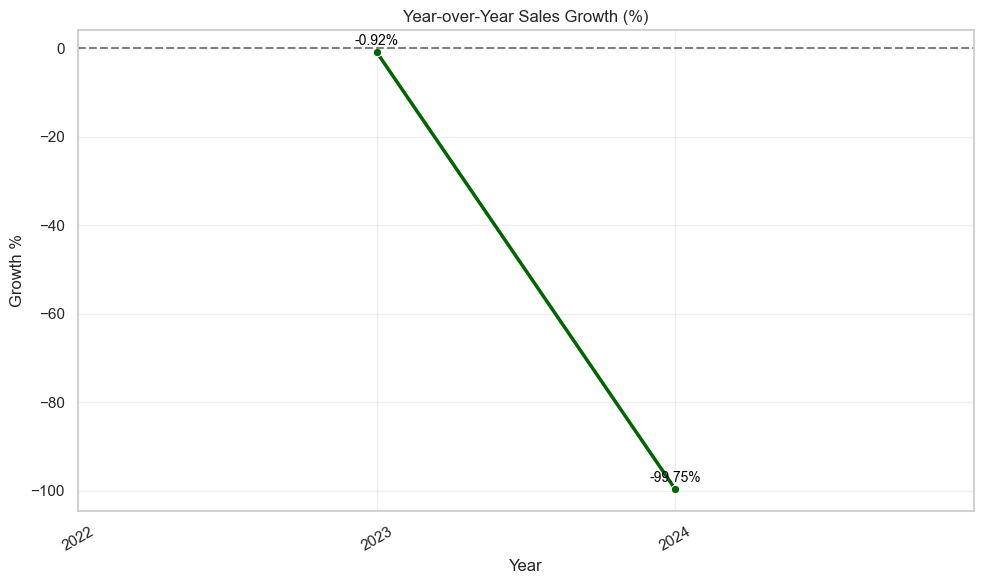

In [612]:
# BR1 visualization
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=yearly_sales, x='year', y='yoy_growth_%', marker='o', linewidth=2.5, color='darkgreen')

# Titles and labels
ax.set_title('Year-over-Year Sales Growth (%)')
ax.set_xlabel('Year')
ax.set_xlim(2022, 2025)
ax.set_xticks(range(2022, 2025))
ax.set_ylabel('Growth %')
ax.tick_params(axis='x', rotation=30)

# Annotate each data point directly
for i, row in yearly_sales.iterrows():
    if pd.notnull(row['yoy_growth_%']):
        ax.annotate(
            f"{row['yoy_growth_%']:,.2f}%",
            xy=(row['year'], row['yoy_growth_%']),
            xytext=(0, 5),
            textcoords="offset points",
            ha='center',
            fontsize=10,
            color='black'
        )


# Visual details
plt.axhline(0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('br1-1.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [613]:
from PIL import Image
# Load both images
img1 = Image.open('br1-0.png')
img2 = Image.open('br1-1.png')
img1.show()
img2.show()


In [614]:
# Resize to same height (optional but recommended for alignment)
height = max(img1.height, img2.height)
img1 = img1.resize((int(img1.width * height / img1.height), height))
img2 = img2.resize((int(img2.width * height / img2.height), height))

# Create new image with combined width
combined_width = img1.width + img2.width
combined_img = Image.new('RGB', (combined_width, height), color='white')

# Paste side by side
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (img1.width, 0))

# Save and show
combined_img.save('br1.png')
combined_img.show()

In [615]:
# BR2 starts now

max_sales_value = df['sales'].max()
best_selling_category = df[df['sales'] == max_sales_value]
best_selling_category

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,sales,month,year
59241,2023-08-16,S003,P0002,Furniture,East,497,483,108,502.77,99.09,5,Cloudy,0,102.70,Spring,"47,860.47",8,2023


In [616]:
print(best_selling_category[['year','Category', 'sales']])

       year   Category     sales
59241  2023  Furniture 47,860.47


In [617]:
least_sales_value = df['sales'].min()
worst_selling_category = df[df['sales'] == least_sales_value]
worst_selling_category

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,sales,month,year
63,2022-01-01,S004,P0004,Groceries,West,437,0,160,-2.40,87.23,10,Sunny,0,90.36,Spring,0.00,1,2022
159,2022-01-02,S003,P0020,Electronics,East,155,0,92,9.42,57.07,10,Rainy,1,53.34,Summer,0.00,1,2022
303,2022-01-04,S001,P0004,Electronics,North,209,0,123,15.37,44.81,5,Sunny,1,45.53,Winter,0.00,1,2022
1107,2022-01-12,S001,P0008,Clothing,West,432,0,33,-3.55,55.07,0,Cloudy,0,51.15,Autumn,0.00,1,2022
1398,2022-01-14,S005,P0019,Groceries,West,65,0,122,-0.03,82.34,20,Rainy,1,79.80,Winter,0.00,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71239,2023-12-14,S002,P0020,Clothing,West,135,0,148,0.35,90.15,15,Cloudy,0,85.24,Winter,0.00,12,2023
72053,2023-12-22,S003,P0014,Toys,South,421,0,133,-4.03,11.71,15,Cloudy,0,12.11,Summer,0.00,12,2023
72078,2023-12-22,S004,P0019,Electronics,East,301,0,24,-9.08,59.17,5,Cloudy,1,58.16,Autumn,0.00,12,2023
72463,2023-12-26,S004,P0004,Electronics,North,101,0,70,16.66,72.31,20,Snowy,1,76.93,Summer,0.00,12,2023


In [618]:
print(worst_selling_category[['year','Category', 'sales']])

       year     Category  sales
63     2022    Groceries   0.00
159    2022  Electronics   0.00
303    2022  Electronics   0.00
1107   2022     Clothing   0.00
1398   2022    Groceries   0.00
...     ...          ...    ...
71239  2023     Clothing   0.00
72053  2023         Toys   0.00
72078  2023  Electronics   0.00
72463  2023  Electronics   0.00
72917  2023     Clothing   0.00

[360 rows x 3 columns]


In [619]:
if least_sales_value == 0.0 and len(df[df['sales'] > 0]) > 0: # Check if there are any non-zero sales
    lowest_non_zero_sales_value = df[df['sales'] > 0]['sales'].min()
    lowest_selling_products_non_zero = df[df['sales'] == lowest_non_zero_sales_value]
    print(f"\n--- Lowest-Selling Category(s) (Non-Zero Sales: {lowest_non_zero_sales_value}) ---")
    print(lowest_selling_products_non_zero[['year','Category', 'sales']])
else:
    print("\nNote: Minimum sales value is not 0, or all sales are 0.")



--- Lowest-Selling Category(s) (Non-Zero Sales: 10.11) ---
       year   Category  sales
46046  2023  Furniture  10.11


In [620]:
# Define the columns you want to group by for your analysis
grouping_dimensions = [
    'year',
    'Category',
]

# Create an empty list to store results if you want to gather them in a DataFrame later
results = []

print("--- Best and Worst Selling Products Breakdown ---")

# Iterate through each unique combination of your grouping dimensions
for name, group in df.groupby(grouping_dimensions):

    # Unpack the current group's identifying values
    current_year, current_category = name

    # Skip if the group is empty (shouldn't happen with valid groupby but good practice)
    if group.empty:
        continue

    # Find max and min sales within the current group
    max_sales_in_group = group['sales'].max()
    min_sales_in_group = group['sales'].min()

    # Identify product(s) with max sales in this group
    best_category_in_group = group[group['sales'] == max_sales_in_group]
    # Use drop_duplicates in case multiple products have the exact same max sales value
    best_category_info = best_category_in_group[['Category', 'sales']].drop_duplicates()

    # Identify product(s) with min sales in this group
    worst_category_in_group = group[group['sales'] == min_sales_in_group]
    worst_category_info = worst_category_in_group[['Category', 'sales']].drop_duplicates()

    # If you want to exclude 0 sales as "worst-selling" and find the lowest non-zero sale
    lowest_non_zero_sales_in_group = None
    lowest_selling_category_non_zero_info = None

    if min_sales_in_group == 0.0 and len(group[group['sales'] > 0]) > 0:
        lowest_non_zero_sales_in_group = group[group['sales'] > 0]['sales'].min()
        lowest_selling_category_non_zero = group[group['sales'] == lowest_non_zero_sales_in_group]
        lowest_selling_category_non_zero_info = lowest_selling_category_non_zero[['Category', 'sales']].drop_duplicates()


    # Print results for the current group
    print(f"\n----- Breakdown for -----")
    print(f"Year: {current_year}, Category: {current_category}")
    print("-------------------------")

    print(f"Best-Selling Category(s) (Sales: {max_sales_in_group:.2f}):")
    print(best_category_info.to_string(index=False)) # .to_string(index=False) for cleaner output

    print(f"\nWorst-Selling Category(s) (Sales: {min_sales_in_group:.2f}):")
    print(worst_category_info.to_string(index=False))

    if lowest_non_zero_sales_in_group is not None:
        print(f"\nLowest Non-Zero Selling Category(s) (Sales: {lowest_non_zero_sales_in_group:.2f}):")
        print(lowest_selling_category_non_zero_info.to_string(index=False))

    print("\n" + "="*50) # Separator for clarity

    # Optional: Append results to the list for later DataFrame creation
    results.append({
        'Year': current_year,
        'Category': current_category,
        'Max_Sales': max_sales_in_group,
        'Best_Categories': best_category_info['Category'].tolist(), # Store as list
        'Min_Sales': min_sales_in_group,
        'Worst_Categories': worst_category_info['Category'].tolist(),
        'Lowest_Non_Zero_Sales': lowest_non_zero_sales_in_group,
        'Lowest_Non_Zero_Categories': lowest_selling_category_non_zero_info['Category'].tolist() if lowest_selling_category_non_zero_info is not None else []
    })

# Convert results to a DataFrame if you want to analyze them further
# final_results_df = pd.DataFrame(results)
# print("\n--- Summary DataFrame of Results ---")
# print(final_results_df.head()) # print first few rows of the summary

--- Best and Worst Selling Products Breakdown ---

----- Breakdown for -----
Year: 2022, Category: Clothing
-------------------------
Best-Selling Category(s) (Sales: 45575.88):
Category     sales
Clothing 45,575.88

Worst-Selling Category(s) (Sales: 0.00):
Category  sales
Clothing   0.00

Lowest Non-Zero Selling Category(s) (Sales: 12.23):
Category  sales
Clothing  12.23


----- Breakdown for -----
Year: 2022, Category: Electronics
-------------------------
Best-Selling Category(s) (Sales: 44500.50):
   Category     sales
Electronics 44,500.50

Worst-Selling Category(s) (Sales: 0.00):
   Category  sales
Electronics   0.00

Lowest Non-Zero Selling Category(s) (Sales: 13.79):
   Category  sales
Electronics  13.79


----- Breakdown for -----
Year: 2022, Category: Furniture
-------------------------
Best-Selling Category(s) (Sales: 45584.12):
 Category     sales
Furniture 45,584.12

Worst-Selling Category(s) (Sales: 0.00):
 Category  sales
Furniture   0.00

Lowest Non-Zero Selling Categor

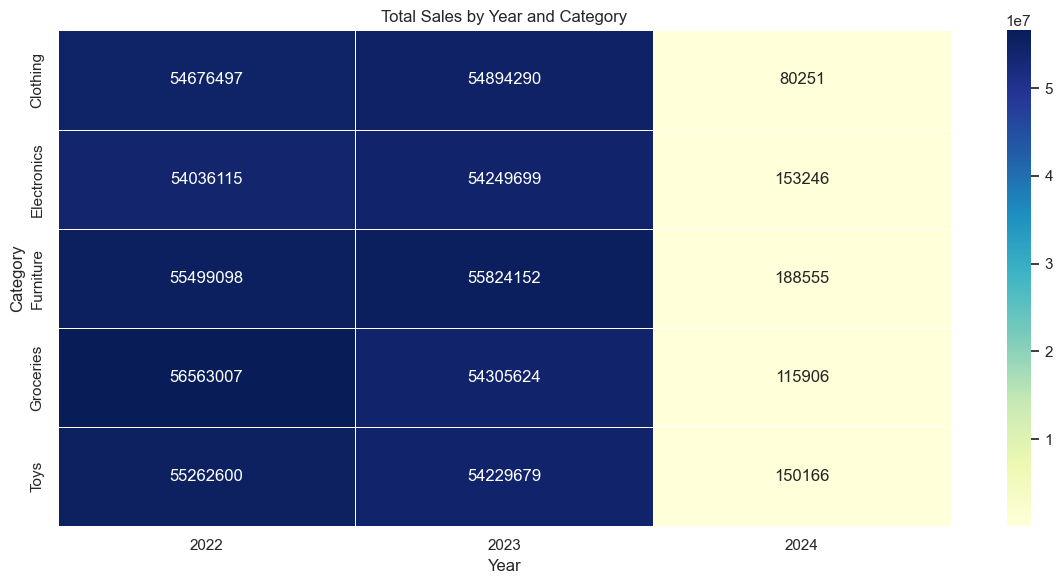

In [621]:
# BR2 Visualization
heatmap_df = df.groupby(['Category', 'year'])['sales'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Year and Category')
plt.xlabel('Year')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('br2.png', bbox_inches='tight', dpi=300)
plt.show()



In [622]:
# GAR 2 starts here
category_performance = (
    df.groupby(['year', 'Category'])['Units Sold']
    .sum()
    .reset_index()
    .sort_values(['year', 'Units Sold'], ascending=[True, False])
)
category_performance.columns = ['Year', 'Category', 'Total_Quantity_Sold']




C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\1528945594.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Total_Quantity_Sold'))


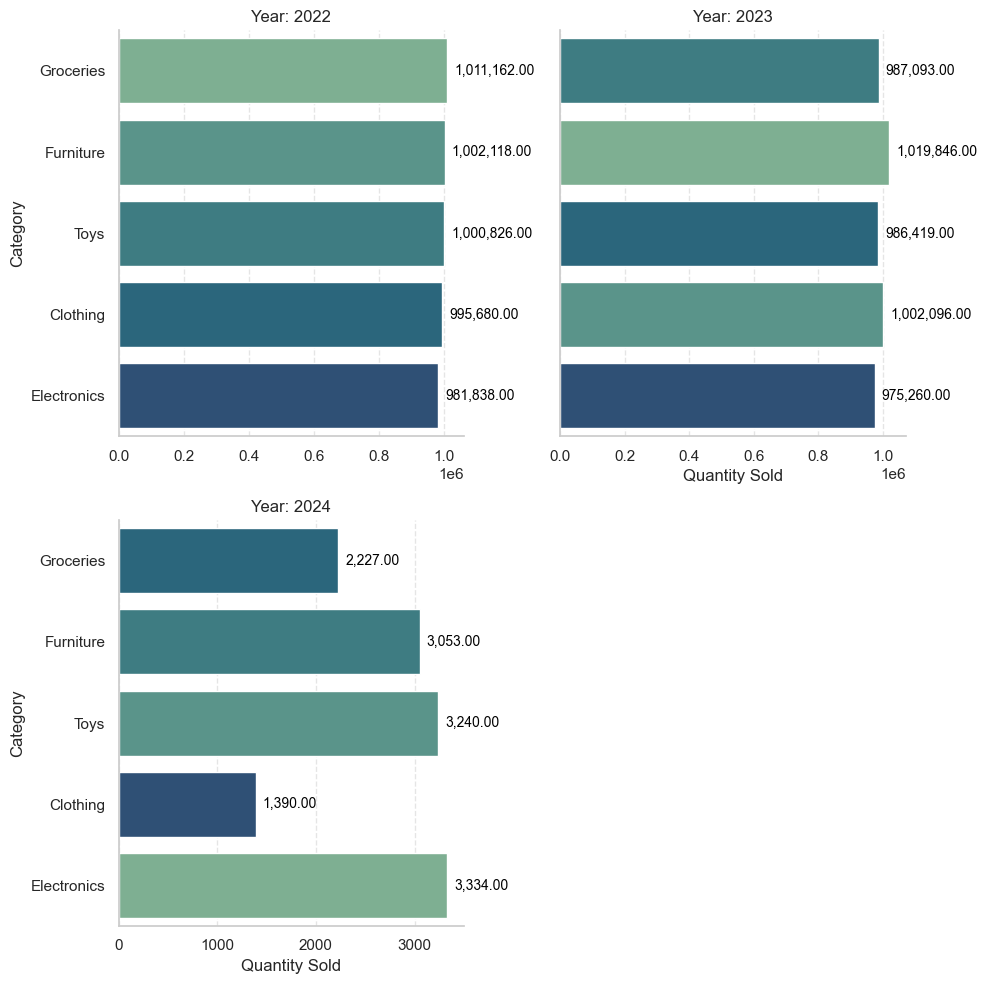

In [623]:
# # GAR 2 visualization
top_performers = (
    category_performance
    .groupby('Year')
    .apply(lambda x: x.nlargest(5, 'Total_Quantity_Sold'))
    .reset_index(drop=True)
)

# Set up the grid
g = sns.FacetGrid(top_performers, col='Year', col_wrap=2, height=5, sharex=False)

# Draw barplots on each facet
g.map_dataframe(
    sns.barplot,
    x='Total_Quantity_Sold',
    y='Category',
    hue = 'Category',
    palette='crest'
)

# Add titles and layout tweaks
g.set_titles(col_template='Year: {col_name}')
g.set_axis_labels('Quantity Sold', 'Category')
g.set(xlim=(0, None))
# Annotate each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        if not pd.isna(width):
            ax.annotate(
                f'{width:,.2f}',
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va='center',
                fontsize=10,
                color='black'
            )
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [624]:
# BR3 starts here
performance = (
    df
    .groupby('Category')[['sales', 'Price', 'Competitor Pricing']]
    .agg({
        'sales': 'sum',
        'Price': 'mean',
        'Competitor Pricing': 'mean'
    })
    .reset_index()
)

# Rank by total sales (dense rank: ties get same rank, next rank increments by 1)
performance['Rank'] = performance['sales'].rank(method='dense', ascending=False)
top5    = performance[performance['Rank'] <= 5].sort_values('Rank')
bottom5 = performance[performance['Rank'] > performance['Rank'].max() - 5].sort_values('Rank', ascending=False)



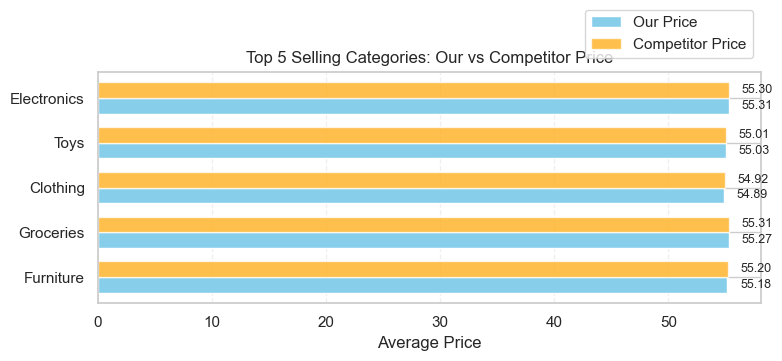

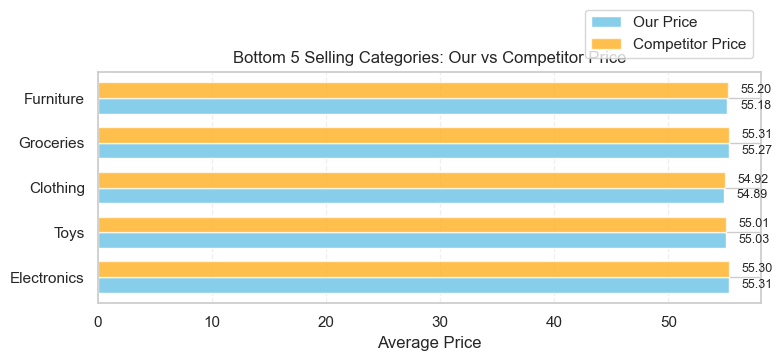

In [625]:
# BR3 visualization
def plot_grouped_price_comparison(df_subset, title):
    fig, ax = plt.subplots(figsize=(8, 4))

    # y positions and bar thickness
    y = np.arange(len(df_subset))
    bar_height = 0.35

    our_prices = df_subset['Price'].values
    comp_prices = df_subset['Competitor Pricing'].values

    # draw our bars offset up, competitor bars offset down
    ax.barh(y - bar_height/2, our_prices, height=bar_height,
            color='skyblue', label='Our Price')
    ax.barh(y + bar_height/2, comp_prices, height=bar_height,
            color='orange', alpha=0.7, label='Competitor Price')

    # Category labels
    ax.set_yticks(y)
    ax.set_yticklabels(df_subset['Category'])
    ax.set_xlabel('Average Price')
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.3), frameon=True)

    # Annotate each bar with its value
    for i, v in enumerate(our_prices):
        ax.text(v + 0.02*max(our_prices.max(), comp_prices.max()),
                i - bar_height/2, f'{v:.2f}',
                va='center', fontsize=9)
    for i, v in enumerate(comp_prices):
        ax.text(v + 0.02*max(our_prices.max(), comp_prices.max()),
                i + bar_height/2, f'{v:.2f}',
                va='center', fontsize=9)

    ax.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('br3.png', bbox_inches='tight', dpi=300)
    plt.show()

# Now call for your top and bottom performers:
plot_grouped_price_comparison(top5,    'Top 5 Selling Categories: Our vs Competitor Price')
plot_grouped_price_comparison(bottom5, 'Bottom 5 Selling Categories: Our vs Competitor Price')

In [626]:
# GAR3 starts here
# 1) Build SKU performance table
sku_perf = (
    df
    .groupby(['Product ID','Category'])
    .agg(
        Units_Sold=('Units Sold','sum'),
        Avg_Price=('Price','mean'),
        Avg_Comp_Price=('Competitor Pricing','mean')
    )
    .reset_index()
)

# 2) Pick top & bottom N SKUs by volume
N = 5
top_skus    = sku_perf.nlargest(N, 'Units_Sold')
bottom_skus = sku_perf.nsmallest(N, 'Units_Sold')

# Combine for batch processing
bench_list = pd.concat([top_skus.assign(Bench='Top'),
                        bottom_skus.assign(Bench='Bottom')],
                       ignore_index=True)

# 3) Build a summary table of peer stats for each SKU
summary_rows = []
for _, sku in bench_list.iterrows():
    peers = sku_perf[sku_perf['Category'] == sku['Category']]
    stats = peers['Avg_Price'].agg(['min','quantile','median','mean','max'])
    summary_rows.append({
        'Product ID':      sku['Product ID'],
        'Category':        sku['Category'],
        'Bench':           sku['Bench'],
        'Units_Sold':      sku['Units_Sold'],
        'Our_Price':       sku['Avg_Price'],
        'Peer_Min':        stats['min'],
        'Peer_25th':       stats['quantile'],   # default .25
        'Peer_Median':     stats['median'],
        'Peer_Mean':       stats['mean'],
        'Peer_Max':        stats['max']
    })

summary_df = pd.DataFrame(summary_rows)
print(summary_df)


# 4) Prepare data for plotting: gather peer prices + our price flag
plot_data = []
for _, sku in bench_list.iterrows():
    peers = sku_perf[sku_perf['Category'] == sku['Category']].copy()
    peers['Bench_SKU'] = sku['Product ID']
    peers['Type'] = np.where(peers['Product ID']==sku['Product ID'], 'Our SKU', 'Peer SKUs')
    plot_data.append(peers[['Bench_SKU','Type','Avg_Price']])

plot_df = pd.concat(plot_data, ignore_index=True)

  Product ID     Category   Bench  Units_Sold  Our_Price  Peer_Min  Peer_25th  \
0      P0015    Furniture     Top      112139      54.75     54.04      54.86   
1      P0014         Toys     Top      111071      55.21     52.80      55.16   
2      P0020         Toys     Top      110815      55.79     52.80      55.16   
3      P0016    Groceries     Top      110560      53.34     53.10      55.31   
4      P0009     Clothing     Top      107734      56.07     53.06      54.83   
5      P0018         Toys  Bottom       87252      53.65     52.80      55.16   
6      P0019  Electronics  Bottom       90153      53.46     53.46      55.12   
7      P0020     Clothing  Bottom       90661      54.55     53.06      54.83   
8      P0009  Electronics  Bottom       90847      53.54     53.46      55.12   
9      P0013     Clothing  Bottom       91623      53.78     53.06      54.83   

   Peer_Median  Peer_Mean  Peer_Max  
0        54.86      55.18     57.05  
1        55.16      55.01     57

C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\3632090142.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


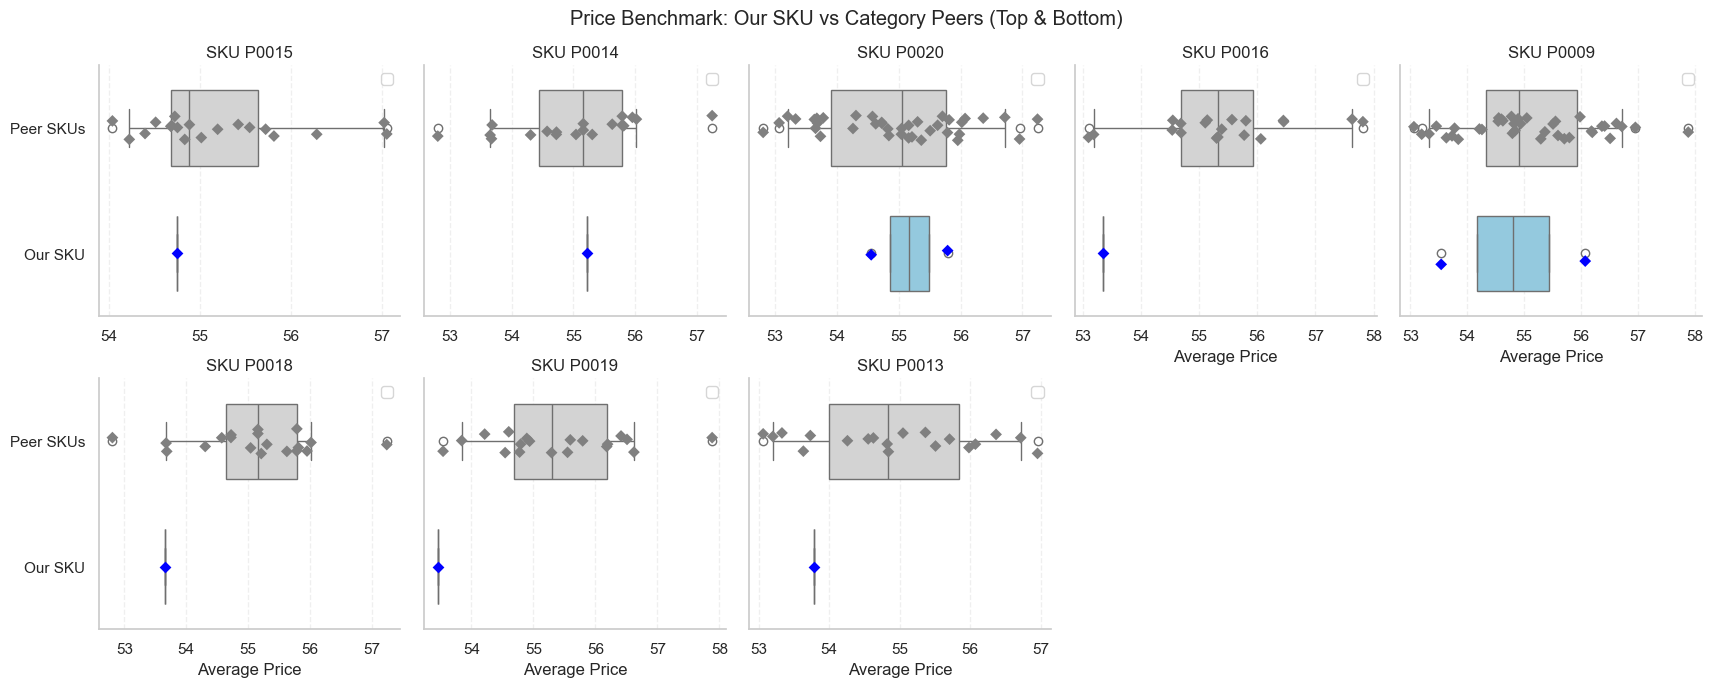

In [627]:
# GAR3 visualization
# 5) FacetGrid of boxplots + swarm overlay
g = sns.FacetGrid(plot_df, col='Bench_SKU', col_wrap=5, height=3.5, sharex=False)
g.map_dataframe(
    sns.boxplot,
    x='Avg_Price',
    y='Type',
    hue = 'Type',
    palette={'Peer SKUs':'lightgray','Our SKU':'skyblue'},
    whis=[5,95],  # show 5th–95th percentile whiskers
    width=0.6
)
g.map_dataframe(
    sns.stripplot,
    x='Avg_Price',
    y='Type',
    hue='Type',
    palette={'Peer SKUs':'gray','Our SKU':'blue'},
    size=6,
    dodge=False,
    marker='D'
)

# Tidy up each facet
for ax in g.axes.flat:
    sku = ax.get_title().split(' = ')[1]
    ax.set_title(f"SKU {sku}")
    ax.set_ylabel('')
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.legend()

g.set_xlabels('Average Price')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price Benchmark: Our SKU vs Category Peers (Top & Bottom)')
plt.show()

In [628]:
# BR4 starts here
regional_sale_performance = (
    df
    .groupby(['Region', 'year'])[['sales']]
    .agg({'sales': 'sum'})
    .reset_index()
)

# Rank regions by total sales over all years (BR4-style insight)
regional_totals = (
    regional_sale_performance
    .groupby('Region')['sales']
    .sum()
    .reset_index()
    .sort_values('sales', ascending=False)
)

regional_totals['Rank'] = regional_totals['sales'].rank(method='dense', ascending=False)
print(regional_totals)


  Region          sales  Rank
0   East 138,712,054.33  1.00
2  South 138,483,566.84  2.00
1  North 137,255,267.35  3.00
3   West 135,777,996.39  4.00


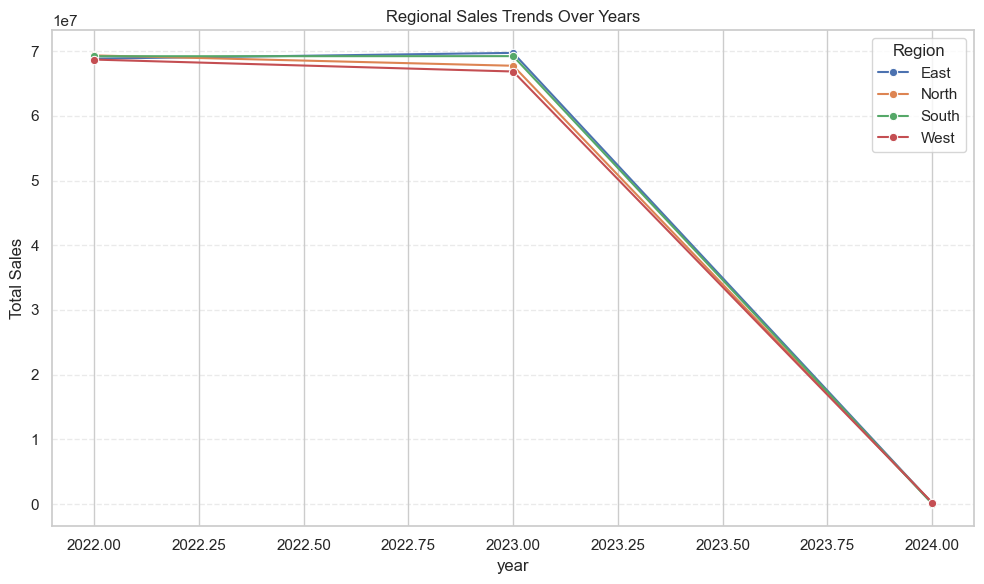

In [629]:
# BR4 visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=regional_sale_performance, x='year', y='sales', hue='Region', marker='o')
plt.title('Regional Sales Trends Over Years')
plt.ylabel('Total Sales')
'''plt.annotate('Intersection', xy=(np.pi/4, np.sin(np.pi/4)), xytext=(3, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))'''

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('br4.png', bbox_inches='tight', dpi=300)
plt.show()



In [630]:
# GAR4 starts here
# Optional: create a pivot table for direct year-on-year comparison
regional_pivot = regional_sale_performance.pivot(index='Region', columns='year', values='sales').fillna(0)
print(regional_pivot)

year            2022          2023       2024
Region                                       
East   68,826,604.52 69,719,318.68 166,131.13
North  69,327,462.93 67,727,567.13 200,237.29
South  69,198,472.41 69,215,826.10  69,268.33
West   68,684,776.87 66,840,731.91 252,487.61


In [631]:
# BR5 starts here
# Step 1: Aggregate total sales by weather
pd.options.display.float_format = '{:,.2f}'.format

weather_sale_performance = (
    df.groupby('Weather Condition')['sales']
    .sum()
    .reset_index()
)

# Step 2: Add percentage contribution
weather_sale_performance['Percent'] = (
    weather_sale_performance['sales'] / weather_sale_performance['sales'].sum()
) * 100

# Step 3: Add rank
weather_sale_performance['Rank'] = weather_sale_performance['sales'].rank(method='dense', ascending=False)

# Display result
print(weather_sale_performance.sort_values('Rank'))


  Weather Condition          sales  Percent  Rank
3             Sunny 139,094,158.32    25.28  1.00
0            Cloudy 138,481,622.69    25.17  2.00
1             Rainy 136,673,829.34    24.84  3.00
2             Snowy 135,979,274.56    24.71  4.00


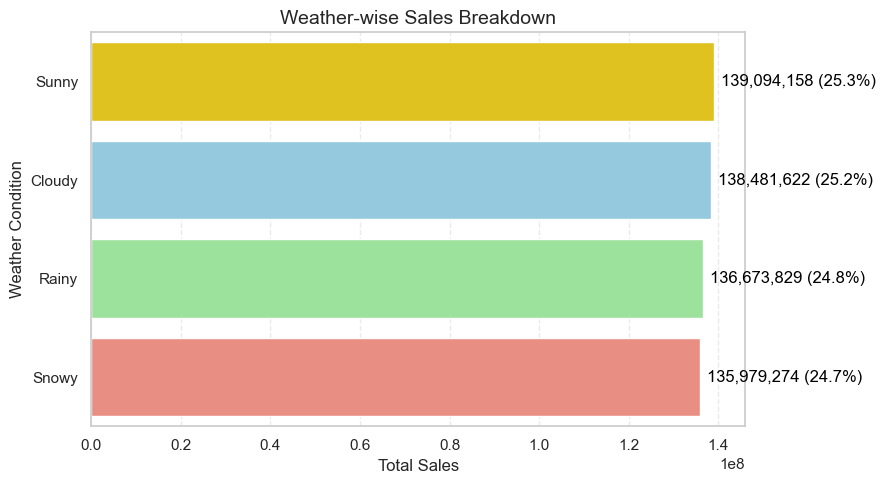

In [632]:
# BR5 visualization

pd.reset_option('display.float_format')

# Sort for clean display
weather_sorted = weather_sale_performance.sort_values('sales', ascending=False)

# Set up color hues manually to separate close bars
colors = ['gold', 'skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(9, 5))
bars = sns.barplot(
    data=weather_sorted,
    x='sales',
    y='Weather Condition',
    hue='Weather Condition',
    palette=colors
)

# Title with weather icons
plt.title('Weather-wise Sales Breakdown', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Weather Condition')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate bars with sales + percent
for i, bar in enumerate(bars.patches):
    sales_val = weather_sorted.iloc[i]['sales']
    percent_val = weather_sorted.iloc[i]['Percent']
    bars.annotate(
        f"{int(sales_val):,} ({percent_val:.1f}%)",
        (sales_val, bar.get_y() + bar.get_height()/2),
        xytext=(5, 0),
        textcoords='offset points',
        va='center',
        fontsize=12,
        color='black'
    )

plt.tight_layout()
plt.savefig('br5.png', bbox_inches='tight', dpi=300)
plt.show()


In [633]:
#GAR5

'''GAR5 aggregates total sales by weather condition, revealing that Sunny and Cloudy days contribute the most—together driving over 50% of total sales.'''

'GAR5 aggregates total sales by weather condition, revealing that Sunny and Cloudy days contribute the most—together driving over 50% of total sales.'

In [634]:
# BR6 starts here

pd.options.display.float_format = '{:,.2f}'.format


# Total sales + transaction counts
promotion_stats = (
    df.groupby('Holiday/Promotion')['sales']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'Total Sales', 'count': 'Txn Count'})
)

promotion_stats['Sales Per Transaction'] = promotion_stats['Total Sales'] / promotion_stats['Txn Count']
promotion_stats['Percent Contribution'] = (promotion_stats['Total Sales'] / promotion_stats['Total Sales'].sum()) * 100

# Step 3: Add rank
promotion_stats['Rank'] = promotion_stats['Total Sales'].rank(method='dense', ascending=False)

print(promotion_stats)





   Holiday/Promotion    Total Sales  Txn Count  Sales Per Transaction  \
0                  0 276,472,261.17      36747               7,523.67   
1                  1 273,756,623.74      36353               7,530.51   

   Percent Contribution  Rank  
0                 50.25  1.00  
1                 49.75  2.00  


In [635]:
non_promo_avg = promotion_stats.loc[promotion_stats['Holiday/Promotion'] == 0, 'Sales Per Transaction'].values[0]
promo_avg     = promotion_stats.loc[promotion_stats['Holiday/Promotion'] == 1, 'Sales Per Transaction'].values[0]

lift = ((promo_avg - non_promo_avg) / non_promo_avg) * 100
print(f"Sales per transaction increased by {lift:.2f}% during promotions.")


Sales per transaction increased by 0.09% during promotions.


In [636]:
# Example: Promo impact across regions
region_promo_impact = (
    df.groupby(['Region', 'Holiday/Promotion'])['sales']
    .agg(['sum', 'count'])
    .reset_index()
)

region_promo_impact['Sales Per Txn'] = region_promo_impact['sum'] / region_promo_impact['count']

print("Promo Impact across regions: ")
print(region_promo_impact)

Promo Impact across regions: 
  Region  Holiday/Promotion           sum  count  Sales Per Txn
0   East                  0 68,893,578.95   9173       7,510.47
1   East                  1 69,818,475.38   9176       7,608.81
2  North                  0 69,212,515.81   9196       7,526.37
3  North                  1 68,042,751.54   9032       7,533.52
4  South                  0 70,477,340.81   9241       7,626.59
5  South                  1 68,006,226.03   9056       7,509.52
6   West                  0 67,888,825.60   9137       7,430.10
7   West                  1 67,889,170.79   9089       7,469.38


In [637]:
# Example: Promo impact across category
category_promo_impact = (
    df.groupby(['Category', 'Holiday/Promotion'])['sales']
    .agg(['sum', 'count'])
    .reset_index()
)

category_promo_impact['Sales Per Txn'] = category_promo_impact['sum'] / category_promo_impact['count']

print("Promo Impact across categories: ")
print(category_promo_impact)

Promo Impact across categories: 
      Category  Holiday/Promotion           sum  count  Sales Per Txn
0     Clothing                  0 54,972,007.30   7375       7,453.83
1     Clothing                  1 54,679,029.70   7251       7,540.90
2  Electronics                  0 54,435,844.33   7306       7,450.84
3  Electronics                  1 54,003,216.85   7215       7,484.85
4    Furniture                  0 55,586,240.47   7338       7,575.12
5    Furniture                  1 55,925,563.87   7361       7,597.55
6    Groceries                  0 55,914,050.66   7293       7,666.81
7    Groceries                  1 55,070,487.54   7318       7,525.35
8         Toys                  0 55,564,118.41   7435       7,473.32
9         Toys                  1 54,078,325.78   7208       7,502.54


In [638]:
# Example: Promo impact across weather
weather_promo_impact = (
    df.groupby(['Weather Condition', 'Holiday/Promotion'])['sales']
    .agg(['sum', 'count'])
    .reset_index()
)

weather_promo_impact['Sales Per Txn'] = weather_promo_impact['sum'] / region_promo_impact['count']

print("Promo Impact across weather conditions: ")
print(weather_promo_impact)

Promo Impact across weather conditions: 
  Weather Condition  Holiday/Promotion           sum  count  Sales Per Txn
0            Cloudy                  0 68,713,578.79   9119       7,490.85
1            Cloudy                  1 69,768,043.90   9141       7,603.32
2             Rainy                  0 69,240,209.28   9226       7,529.38
3             Rainy                  1 67,433,620.06   9052       7,466.08
4             Snowy                  0 68,614,360.20   9192       7,424.99
5             Snowy                  1 67,364,914.36   9080       7,438.71
6             Sunny                  0 69,904,112.90   9210       7,650.66
7             Sunny                  1 69,190,045.42   9080       7,612.50


In [639]:
# Example: Promo impact across seasons
seasonal_promo_impact = (
    df.groupby(['Seasonality', 'Holiday/Promotion'])['sales']
    .agg(['sum', 'count'])
    .reset_index()
)

seasonal_promo_impact['Sales Per Txn'] = seasonal_promo_impact['sum'] / region_promo_impact['count']

print("Promo Impact across seasons: ")
print(seasonal_promo_impact)

Promo Impact across seasons: 
  Seasonality  Holiday/Promotion           sum  count  Sales Per Txn
0      Autumn                  0 69,322,449.30   9165       7,557.23
1      Autumn                  1 68,736,764.80   9028       7,490.93
2      Spring                  0 69,064,655.15   9149       7,510.29
3      Spring                  1 68,047,655.09   9168       7,534.06
4      Summer                  0 68,787,022.80   9217       7,443.68
5      Summer                  1 68,000,750.65   9088       7,508.92
6      Winter                  0 69,298,133.92   9216       7,584.34
7      Winter                  1 68,971,453.20   9069       7,588.45


C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\1365520944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\1365520944.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize='small')


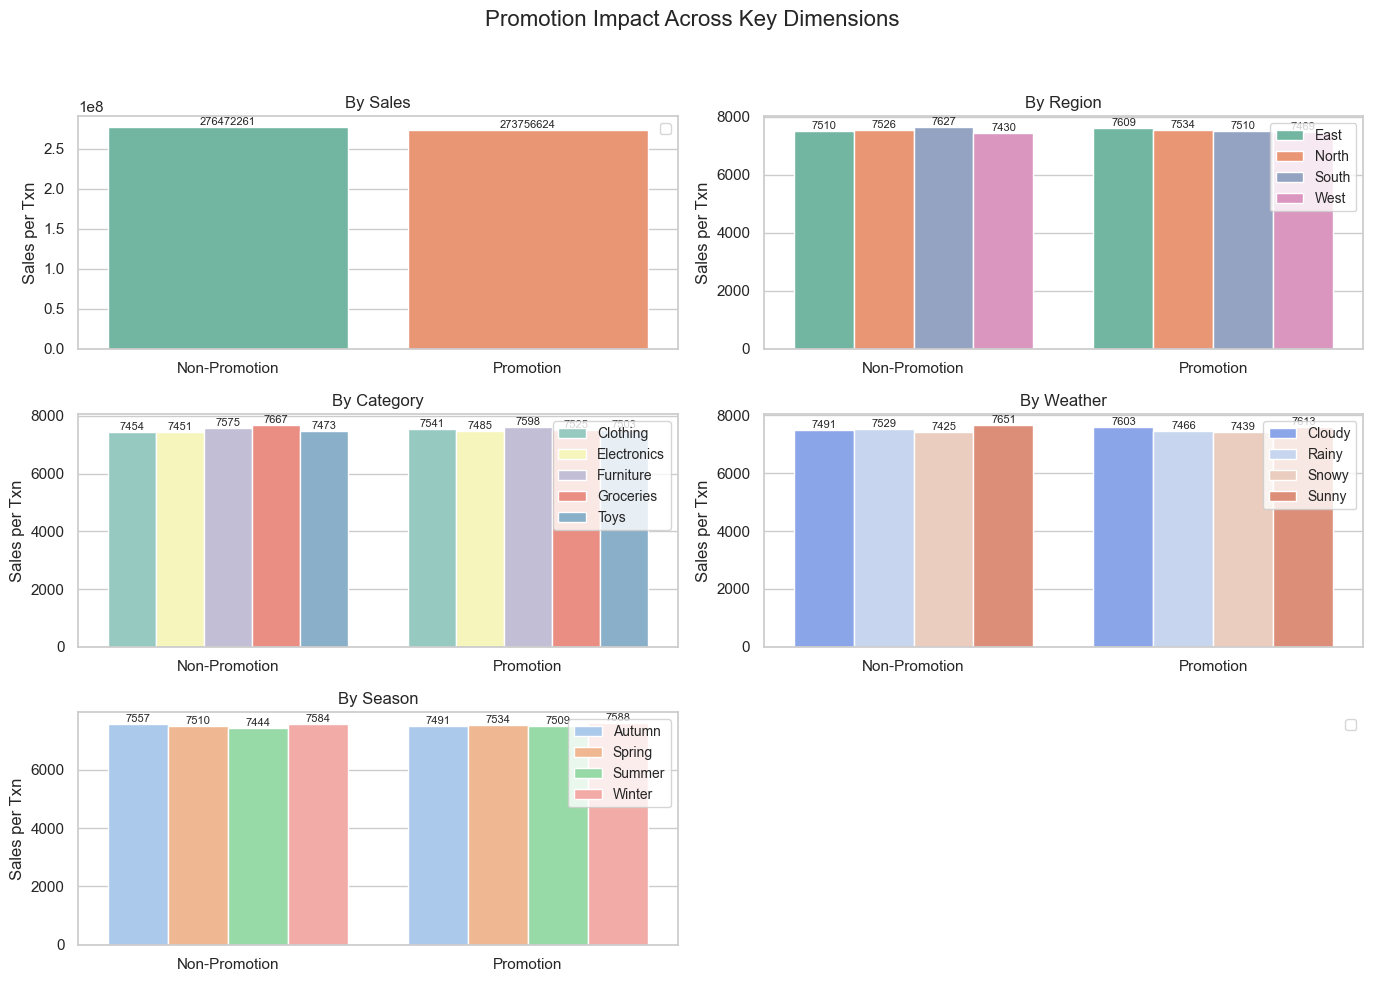

In [640]:
# BR6 visualization

# Common styling
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Promotion Impact Across Key Dimensions', fontsize=16)

# Holiday/Promotion impact on sales
sns.barplot(
    data=promotion_stats,
    x='Holiday/Promotion', y='Total Sales',
    ax=axes[0,0], palette='Set2'
)
axes[0,0].set_title('By Sales')
axes[0,0].set_xticks([0, 1])
axes[0,0].set_xticklabels(['Non-Promotion', 'Promotion'])
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

# Region
sns.barplot(
    data=region_promo_impact,
    x='Holiday/Promotion', y='Sales Per Txn', hue='Region',
    ax=axes[0,1], palette='Set2'
)
axes[0,1].set_title('By Region')
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['Non-Promotion', 'Promotion'])
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

# Category
sns.barplot(
    data=category_promo_impact,
    x='Holiday/Promotion', y='Sales Per Txn', hue='Category',
    ax=axes[1,0], palette='Set3'
)
axes[1,0].set_title('By Category')
axes[1,0].set_xticks([0, 1])
axes[1,0].set_xticklabels(['Non-Promotion', 'Promotion'])
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

# Weather
sns.barplot(
    data=weather_promo_impact,
    x='Holiday/Promotion', y='Sales Per Txn', hue='Weather Condition',
    ax=axes[1,1], palette='coolwarm'
)
axes[1,1].set_title('By Weather')
axes[1,1].set_xticks([0, 1])
axes[1,1].set_xticklabels(['Non-Promotion', 'Promotion'])
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

# Seasonality
sns.barplot(
    data=seasonal_promo_impact,
    x='Holiday/Promotion', y='Sales Per Txn', hue='Seasonality',
    ax=axes[2,0], palette='pastel'
)
axes[2,0].set_title('By Season')
axes[2,0].set_xticks([0, 1])
axes[2,0].set_xticklabels(['Non-Promotion', 'Promotion'])
for container in axes[2,0].containers:
    axes[2,0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)

# Final styling
for ax in axes.flat:
    ax.set_ylabel('Sales per Txn')
    ax.set_xlabel('')
    ax.legend(loc='upper right', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.95])
axes[2,1].axis('off')
plt.savefig('br6.png', bbox_inches='tight', dpi=300)
plt.show()

In [641]:
# BR7 starts here

turnover_df = (
    df.groupby('Product ID')[['Units Sold', 'Inventory Level']]
    .agg({
        'Units Sold': 'sum',
        'Inventory Level': 'mean'  # or use Opening/Closing stock to compute avg
    })
    .reset_index()
)

turnover_df['Turnover Ratio'] = turnover_df['Units Sold'] / turnover_df['Inventory Level']

# Flag low-demand SKUs (e.g., turnover < 1.0)
cutoff = turnover_df['Turnover Ratio'].quantile(0.10)
turnover_df['Low Demand'] = turnover_df['Turnover Ratio'] < cutoff

# Sort to prioritize action
low_demand_products = turnover_df[turnover_df['Low Demand']].sort_values('Turnover Ratio')
print(low_demand_products.head(10))  # Most sluggish movers


  Product ID  Units Sold  Inventory Level  Turnover Ratio  Low Demand
7      P0008      488563           272.77        1,791.09        True
2      P0003      493279           274.93        1,794.18        True


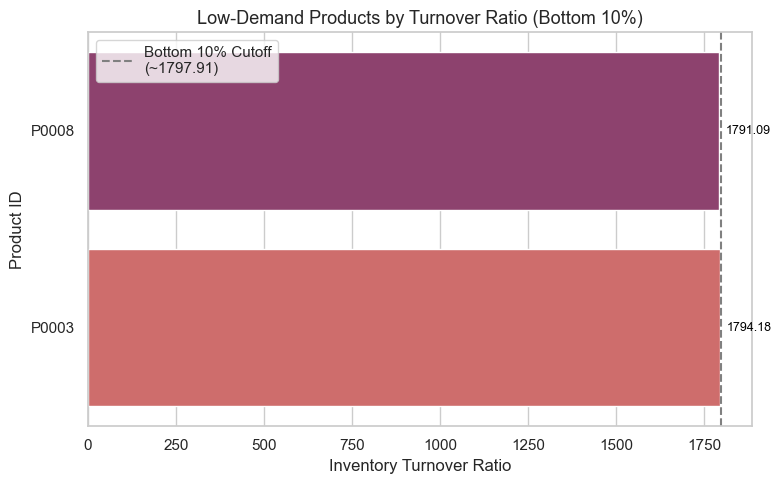

In [642]:
# BR7 visualization
# Prepare data
low_demand_plot = low_demand_products

plt.figure(figsize=(8, 5))
bars = sns.barplot(
    data=low_demand_plot,
    x='Turnover Ratio',
    y='Product ID',
    hue='Product ID',
    palette='flare_r'
)

# Add vertical cutoff line for context
cutoff_value = cutoff
plt.axvline(cutoff_value, color='gray', linestyle='--', label=f'Bottom 10% Cutoff\n(~{cutoff_value:.2f})')

# Annotate each bar with turnover ratio
for i, bar in enumerate(bars.patches):
    turnover_val = low_demand_plot.iloc[i]['Turnover Ratio']
    bars.annotate(
        f"{turnover_val:.2f}",
        (turnover_val, bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        va='center',
        fontsize=9,
        color='black'
    )

# Final styling
plt.title('Low-Demand Products by Turnover Ratio (Bottom 10%)', fontsize=13)
plt.xlabel('Inventory Turnover Ratio')
plt.ylabel('Product ID')
plt.legend()
plt.tight_layout()
plt.savefig('br7.png', bbox_inches='tight',dpi=300)
plt.show()

In [643]:
# GAR7 starts here

# Step 1: Aggregate inventory metrics
leftover_inventory_df = (
    df.groupby('Product ID')[['Units Sold', 'Inventory Level', 'Units Ordered']]
    .agg({
        'Units Sold': 'sum',
        'Inventory Level': 'mean',
        'Units Ordered': 'sum'
    })
    .reset_index()
)

# Step 2: Calculate leftover inventory
leftover_inventory_df['Leftover Inventory'] = leftover_inventory_df['Inventory Level'] - leftover_inventory_df['Units Sold']

print(leftover_inventory_df)


   Product ID  Units Sold  Inventory Level  Units Ordered  Leftover Inventory
0       P0001      498061           272.99         407890         -497,788.01
1       P0002      487827           271.15         402077         -487,555.85
2       P0003      493279           274.93         402987         -493,004.07
3       P0004      495501           271.56         394665         -495,229.44
4       P0005      503648           273.04         400964         -503,374.96
5       P0006      497131           273.57         396421         -496,857.43
6       P0007      499321           274.71         397638         -499,046.29
7       P0008      488563           272.77         402829         -488,290.23
8       P0009      502086           275.32         398726         -501,810.68
9       P0010      496469           274.92         406923         -496,194.08
10      P0011      499362           272.81         400625         -499,089.19
11      P0012      491670           272.51         403404       

In [644]:
# BR8 starts here
# Step 1 find most sold products
most_sold_df = (
    df.groupby('Category')[['Units Sold','sales']]
        .agg({
        'Units Sold': 'sum',
        'sales': 'sum'
    })
    .reset_index()
)

# Sort categories by total units sold
sorted_sales_df = most_sold_df.sort_values('Units Sold', ascending=False)

# Find the top and bottom performers
top_category = sorted_sales_df.iloc[0]
bottom_category = sorted_sales_df.iloc[-1]

print("Most Sold Category:")
print(top_category)

print("\nLeast Sold Category:")
print(bottom_category)

most_sold_df['Revenue per Unit'] = most_sold_df['sales'] / most_sold_df['Units Sold']
print('-' * 60)
print(most_sold_df[['Category', 'Units Sold', 'sales', 'Revenue per Unit']])






Most Sold Category:
Category          Furniture
Units Sold          2025017
sales        111,511,804.34
Name: 2, dtype: object

Least Sold Category:
Category        Electronics
Units Sold          1960432
sales        108,439,061.18
Name: 1, dtype: object
------------------------------------------------------------
      Category  Units Sold          sales  Revenue per Unit
0     Clothing     1999166 109,651,037.00             54.85
1  Electronics     1960432 108,439,061.18             55.31
2    Furniture     2025017 111,511,804.34             55.07
3    Groceries     2000482 110,984,538.20             55.48
4         Toys     1990485 109,642,444.19             55.08


In [645]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\740915273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\740915273.py:31: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\740915273.py:32: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('br8.png', bbox_inches='tight', dpi=300)
D:\EPAM_Data_Analyst_Training\JupyterProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


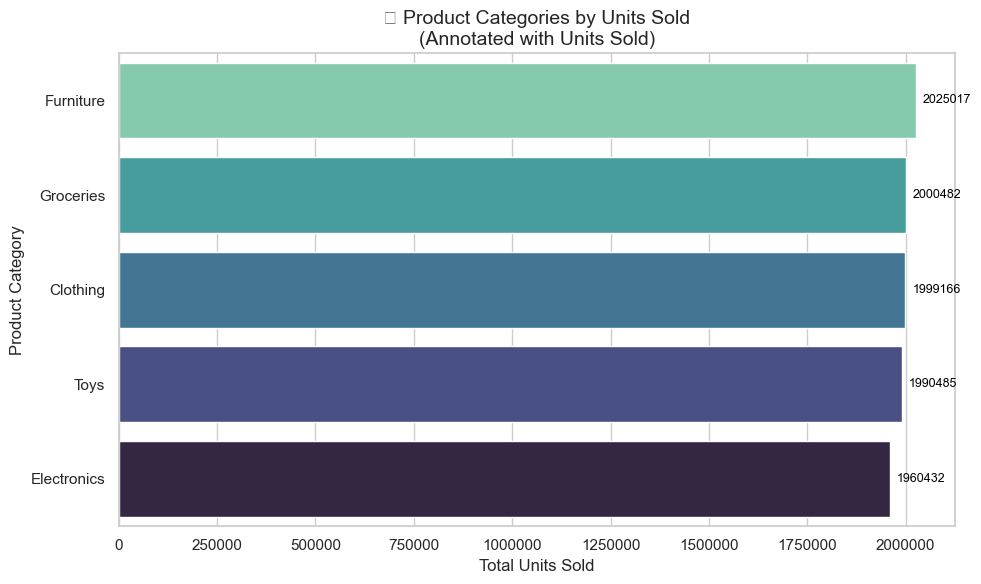

In [646]:
# BR8 visualization

# Sort by Units Sold for visual clarity
plot_df = most_sold_df.sort_values('Units Sold', ascending=False)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=plot_df,
    x='Units Sold',
    y='Category',
    palette='mako_r'
)

# Annotate each bar with Revenue per Unit
for i, bar in enumerate(bars.patches):
    units_sold = plot_df.iloc[i]['Units Sold']
    bars.annotate(
        f"{units_sold}",
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        va='center',
        fontsize=9,
        color='black'
    )

plt.title('📦 Product Categories by Units Sold\n(Annotated with Units Sold)', fontsize=14)
plt.xlabel('Total Units Sold')
plt.ylabel('Product Category')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig('br8.png', bbox_inches='tight', dpi=300)
plt.show()

In [647]:
# GAR8 starts here

category_rank_df = (
    df.groupby('Category')[['Units Sold','sales']]
        .agg({
        'Units Sold': 'sum',
        'sales': 'sum'
    })
    .reset_index()
)

category_rank_df['Rank'] = category_rank_df['sales'].rank(ascending=False)
category_rank_df.sort_values('Rank', ascending=True, inplace=True)
print(category_rank_df)

      Category  Units Sold          sales  Rank
2    Furniture     2025017 111,511,804.34  1.00
3    Groceries     2000482 110,984,538.20  2.00
0     Clothing     1999166 109,651,037.00  3.00
4         Toys     1990485 109,642,444.19  4.00
1  Electronics     1960432 108,439,061.18  5.00


In [648]:
# BR9 starts here

store_accross_region_perf = (
    df.groupby('Region')[['Category', 'Units Sold', 'sales', 'Inventory Level']].agg({
        'Units Sold': 'sum',
        'Inventory Level': 'mean',
        'sales': 'sum',
    })
    .reset_index()
)
print(store_accross_region_perf)



  Region  Units Sold  Inventory Level          sales
0   East     2511265           275.29 138,712,054.33
1  North     2484966           274.80 137,255,267.35
2  South     2507799           275.31 138,483,566.84
3   West     2471552           272.47 135,777,996.39


C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\12535471.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_accross_region_perf, x='Region', y='Units Sold', ax=axes[0], palette='gist_yerg_r')
C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\12535471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_accross_region_perf, x='Region', y='Inventory Level', ax=axes[1], palette='vlag_r')
C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_19864\12535471.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

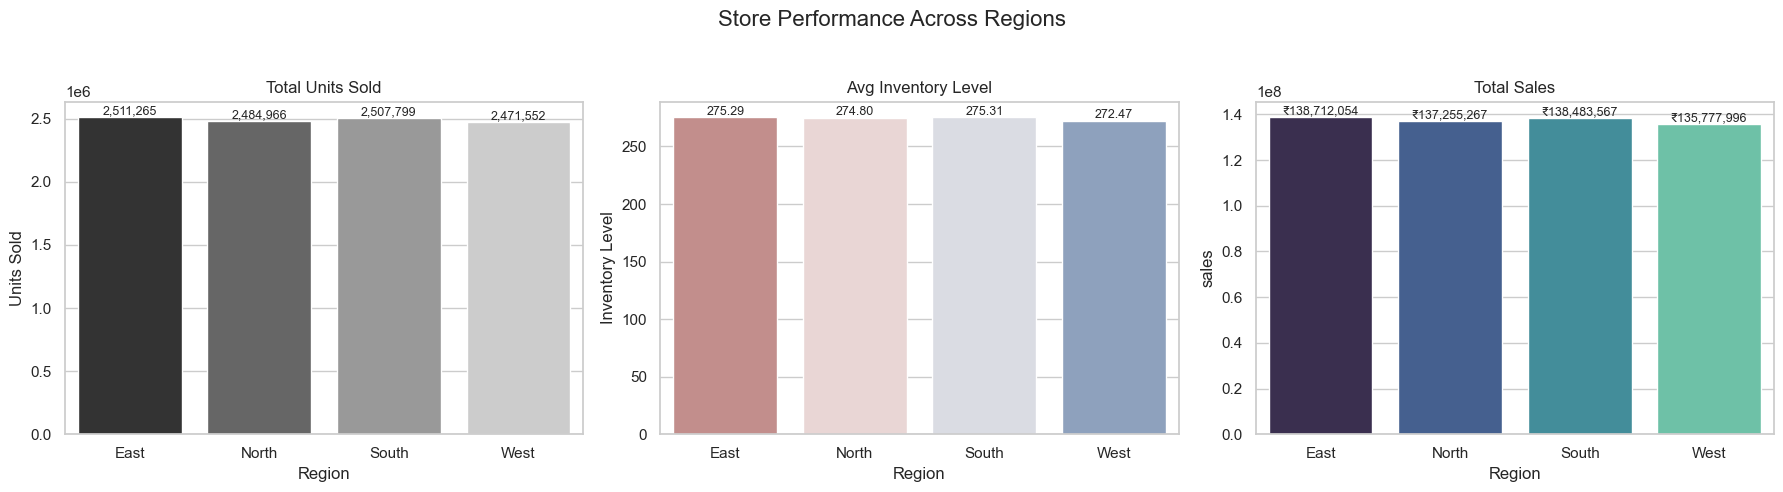

In [649]:
# BR9 visualization

# Convert sales to numeric if needed
store_accross_region_perf['sales'] = store_accross_region_perf['sales'].astype(float)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Store Performance Across Regions', fontsize=16)

# Units Sold
sns.barplot(data=store_accross_region_perf, x='Region', y='Units Sold', ax=axes[0], palette='gist_yerg_r')
axes[0].set_title('Total Units Sold')
# Units Sold
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].annotate(f'{int(height):,}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2), textcoords='offset points', ha='center', fontsize=9)

# Average Inventory Level
sns.barplot(data=store_accross_region_perf, x='Region', y='Inventory Level', ax=axes[1], palette='vlag_r')
axes[1].set_title('Avg Inventory Level')
# Inventory Level
for bar in axes[1].patches:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2), textcoords='offset points', ha='center', fontsize=9)

# Total Sales
sns.barplot(data=store_accross_region_perf, x='Region', y='sales', ax=axes[2], palette='mako')
axes[2].set_title('Total Sales')
for bar in axes[2].patches:
    height = bar.get_height()
    axes[2].annotate(f'₹{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('br9.png', bbox_inches='tight', dpi=300)
plt.show()

In [650]:
# GAR9 starts here
store_sales = (
    df.groupby(['Region', 'Store ID'])[['sales']]
    .sum()
    .reset_index()
)

# Convert sales to numeric if needed
store_sales['sales'] = store_sales['sales'].astype(float)

# Rank stores within each region
store_sales['Rank'] = store_sales.groupby('Region')['sales'].rank(method='dense', ascending=False)

# Get top and bottom store per region
top_stores = store_sales.loc[store_sales.groupby('Region')['sales'].idxmax()]
bottom_stores = store_sales.loc[store_sales.groupby('Region')['sales'].idxmin()]

print(store_sales)
print('-' * 50)
print('The top stores:')
print(top_stores)
print('-' * 50)
print('The bottom stores:')
print(bottom_stores)


   Region Store ID         sales  Rank
0    East     S001 26,901,439.52  5.00
1    East     S002 28,592,756.53  2.00
2    East     S003 27,502,017.17  3.00
3    East     S004 27,073,456.56  4.00
4    East     S005 28,642,384.55  1.00
5   North     S001 27,069,781.20  5.00
6   North     S002 27,523,007.52  2.00
7   North     S003 27,507,852.15  3.00
8   North     S004 27,498,407.07  4.00
9   North     S005 27,656,219.41  1.00
10  South     S001 26,885,497.33  4.00
11  South     S002 27,331,542.90  3.00
12  South     S003 28,902,368.64  1.00
13  South     S004 26,784,189.12  5.00
14  South     S005 28,579,968.85  2.00
15   West     S001 27,330,025.32  3.00
16   West     S002 26,615,180.64  5.00
17   West     S003 27,406,176.08  2.00
18   West     S004 27,591,360.84  1.00
19   West     S005 26,835,253.51  4.00
--------------------------------------------------
The top stores:
   Region Store ID         sales  Rank
4    East     S005 28,642,384.55  1.00
9   North     S005 27,656,219.41  1.

In [651]:
# BR10 starts here

discount_impact = (
        df.groupby(['Discount','Category'])
        .agg({
            'Demand Forecast': 'mean',
            'Units Sold':'count',
            'sales': 'sum'
        })
        .reset_index()
        .sort_values(['Discount', 'Units Sold'], ascending=[True, False])
)
print(discount_impact)


    Discount     Category  Demand Forecast  Units Sold         sales
4          0         Toys           141.81        2959 22,388,218.83
0          0     Clothing           139.52        2946 21,521,434.88
3          0    Groceries           144.34        2937 22,878,548.61
2          0    Furniture           140.75        2932 22,021,128.42
1          0  Electronics           136.98        2888 20,650,279.04
8          5    Groceries           139.70        2971 22,349,093.80
6          5  Electronics           140.72        2960 22,323,172.68
5          5     Clothing           144.33        2924 22,599,865.49
9          5         Toys           140.94        2881 21,725,012.37
7          5    Furniture           142.88        2855 21,165,714.12
12        10    Furniture           143.42        3053 23,187,243.89
14        10         Toys           142.04        2946 21,873,633.76
10        10     Clothing           141.52        2879 21,710,475.83
13        10    Groceries         

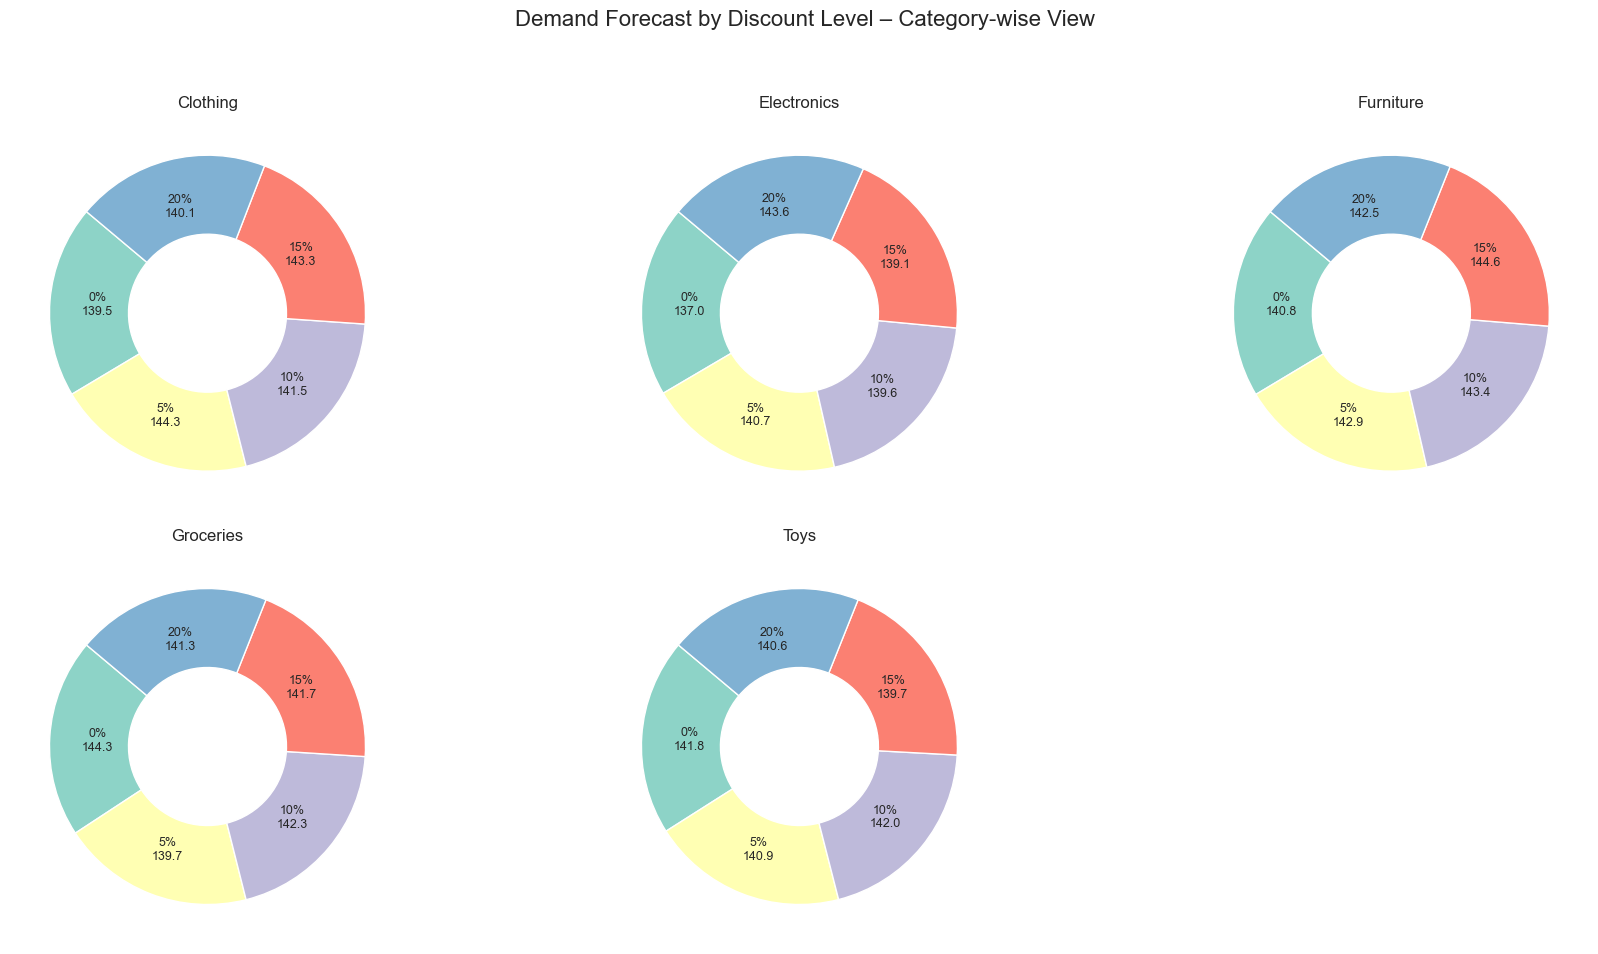

In [652]:
# BR10 visualization
# Aggregate demand forecast by Category and Discount
pie_df = (
    df.groupby(['Category', 'Discount'])['Demand Forecast']
    .mean()
    .reset_index()
)

# Get unique categories
categories = pie_df['Category'].unique()

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust grid as needed
axes = axes.flatten()

# Loop through each category
for i, cat in enumerate(categories):
    data = pie_df[pie_df['Category'] == cat]
    wedges, _ = axes[i].pie(
        data['Demand Forecast'],
        startangle=140,
        wedgeprops=dict(width=0.5, edgecolor='white'),
        colors=plt.cm.Set3.colors  # Poppy color palette
    )

    # Annotate each wedge
    total = data['Demand Forecast'].mean()
    for j, p in enumerate(wedges):
        theta = (p.theta2 + p.theta1) / 2.0
        x = 0.7 * np.cos(np.deg2rad(theta))
        y = 0.7 * np.sin(np.deg2rad(theta))
        label = f"{data.iloc[j]['Discount']}%\n{data.iloc[j]['Demand Forecast']:.1f}"
        axes[i].text(x, y, label, ha='center', va='center', fontsize=9)

    axes[i].set_title(f"{cat}", fontsize=12)

plt.suptitle('Demand Forecast by Discount Level – Category-wise View', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Hide any unused subplot (like the 6th one in a 2x3 layout)
if len(categories) < len(axes):
    for j in range(len(categories), len(axes)):
        fig.delaxes(axes[j])
plt.savefig('br10.png', bbox_inches='tight', dpi=300)
plt.show()

In [653]:
#GAR 10 starts here

# Group by Discount and aggregate
discount_lift = (
    df.groupby(['Category','Discount'])[['Demand Forecast', 'Units Sold', 'sales']]
    .mean()
    .reset_index()
    .sort_values('Discount')
)
def calc_lift(current, base):
    return ((current - base) / base) * 100
# Create a dictionary for quick lookup
lookup = discount_lift.set_index('Discount').to_dict()

categories = df['Category'].unique()
lift_records = []

for cat in categories:
    cat_df = discount_lift[discount_lift['Category'] == cat].set_index('Discount')
    try:
        lift_records.extend([
            {'Category': cat, 'Comparison': '5% vs 0%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][5], cat_df['Demand Forecast'][0])},
            {'Category': cat, 'Comparison': '10% vs 5%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][10], cat_df['Demand Forecast'][5])},
            {'Category': cat, 'Comparison': '10% vs 0%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][10], cat_df['Demand Forecast'][0])},
            {'Category': cat, 'Comparison': '15% vs 10%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][15], cat_df['Demand Forecast'][10])},
            {'Category': cat, 'Comparison': '15% vs 5%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][15], cat_df['Demand Forecast'][5])},
            {'Category': cat, 'Comparison': '15% vs 0%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][15], cat_df['Demand Forecast'][0])},
            {'Category': cat, 'Comparison': '20% vs 15%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][20], cat_df['Demand Forecast'][15])},
            {'Category': cat, 'Comparison': '20% vs 10%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][20], cat_df['Demand Forecast'][10])},
            {'Category': cat, 'Comparison': '20% vs 5%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][20], cat_df['Demand Forecast'][5])},
            {'Category': cat, 'Comparison': '20% vs 0%', 'Lift (%)': calc_lift(cat_df['Demand Forecast'][20], cat_df['Demand Forecast'][0])},
        ])
    except KeyError:
        print(f"⚠️ Missing discount levels for category: {cat}")

lift_summary = pd.DataFrame(lift_records)
for cat in lift_summary['Category'].unique():
    print(f"\n📦 Category: {cat}")
    print(lift_summary[lift_summary['Category'] == cat][['Comparison', 'Lift (%)']].round(2))





📦 Category: Groceries
   Comparison  Lift (%)
0    5% vs 0%     -3.22
1   10% vs 5%      1.84
2   10% vs 0%     -1.44
3  15% vs 10%     -0.37
4   15% vs 5%      1.46
5   15% vs 0%     -1.80
6  20% vs 15%     -0.29
7  20% vs 10%     -0.66
8   20% vs 5%      1.17
9   20% vs 0%     -2.09

📦 Category: Toys
    Comparison  Lift (%)
10    5% vs 0%     -0.62
11   10% vs 5%      0.79
12   10% vs 0%      0.16
13  15% vs 10%     -1.68
14   15% vs 5%     -0.91
15   15% vs 0%     -1.52
16  20% vs 15%      0.67
17  20% vs 10%     -1.02
18   20% vs 5%     -0.24
19   20% vs 0%     -0.85

📦 Category: Electronics
    Comparison  Lift (%)
20    5% vs 0%      2.73
21   10% vs 5%     -0.82
22   10% vs 0%      1.89
23  15% vs 10%     -0.36
24   15% vs 5%     -1.17
25   15% vs 0%      1.53
26  20% vs 15%      3.26
27  20% vs 10%      2.90
28   20% vs 5%      2.05
29   20% vs 0%      4.84

📦 Category: Furniture
    Comparison  Lift (%)
30    5% vs 0%      1.51
31   10% vs 5%      0.38
32   10% vs 0%      1.

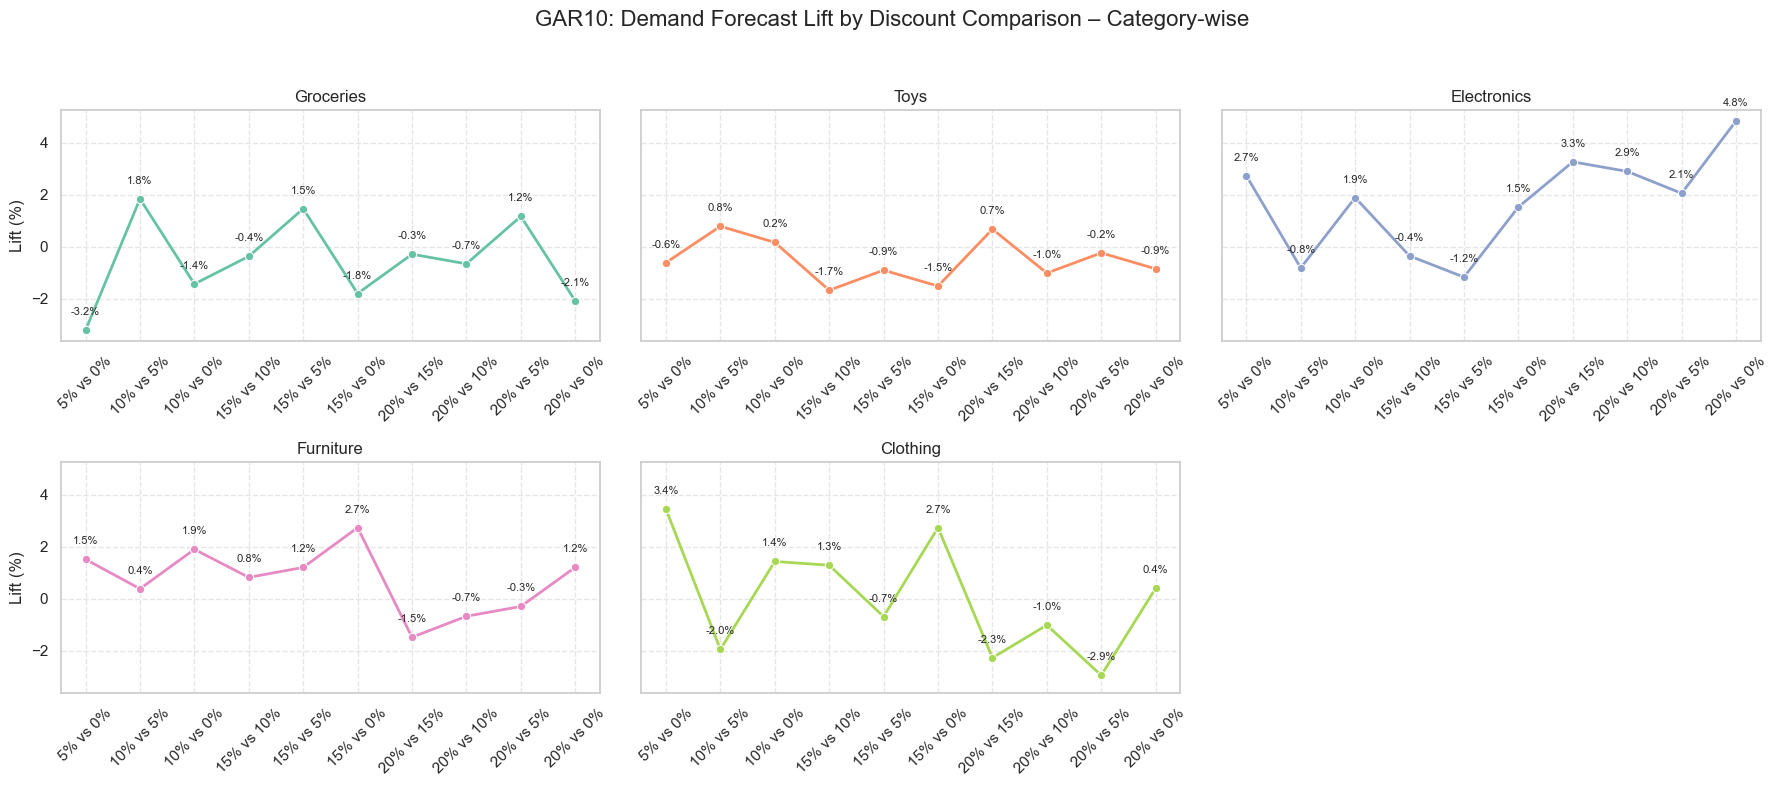

In [654]:
# GAR10 visualization

# Set up the layout
categories = lift_summary['Category'].unique()
n = len(categories)
cols = 3
rows = (n + cols - 1) // cols  # auto-adjust rows
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), sharey=True)
axes = axes.flatten()

# Plot each category separately
for i, cat in enumerate(categories):
    cat_df = lift_summary[lift_summary['Category'] == cat]
    ax = axes[i]

    sns.lineplot(
        data=cat_df,
        x='Comparison',
        y='Lift (%)',
        marker='o',
        ax=ax,
        linewidth=2,
        color=sns.color_palette('Set2')[i % 8]
    )

    # Annotate each point
    for xi, yi in zip(cat_df['Comparison'], cat_df['Lift (%)']):
        ax.text(xi, yi + 0.5, f"{yi:.1f}%", ha='center', va='bottom', fontsize=8)

    ax.set_title(f"{cat}", fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Lift (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('GAR10: Demand Forecast Lift by Discount Comparison – Category-wise', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

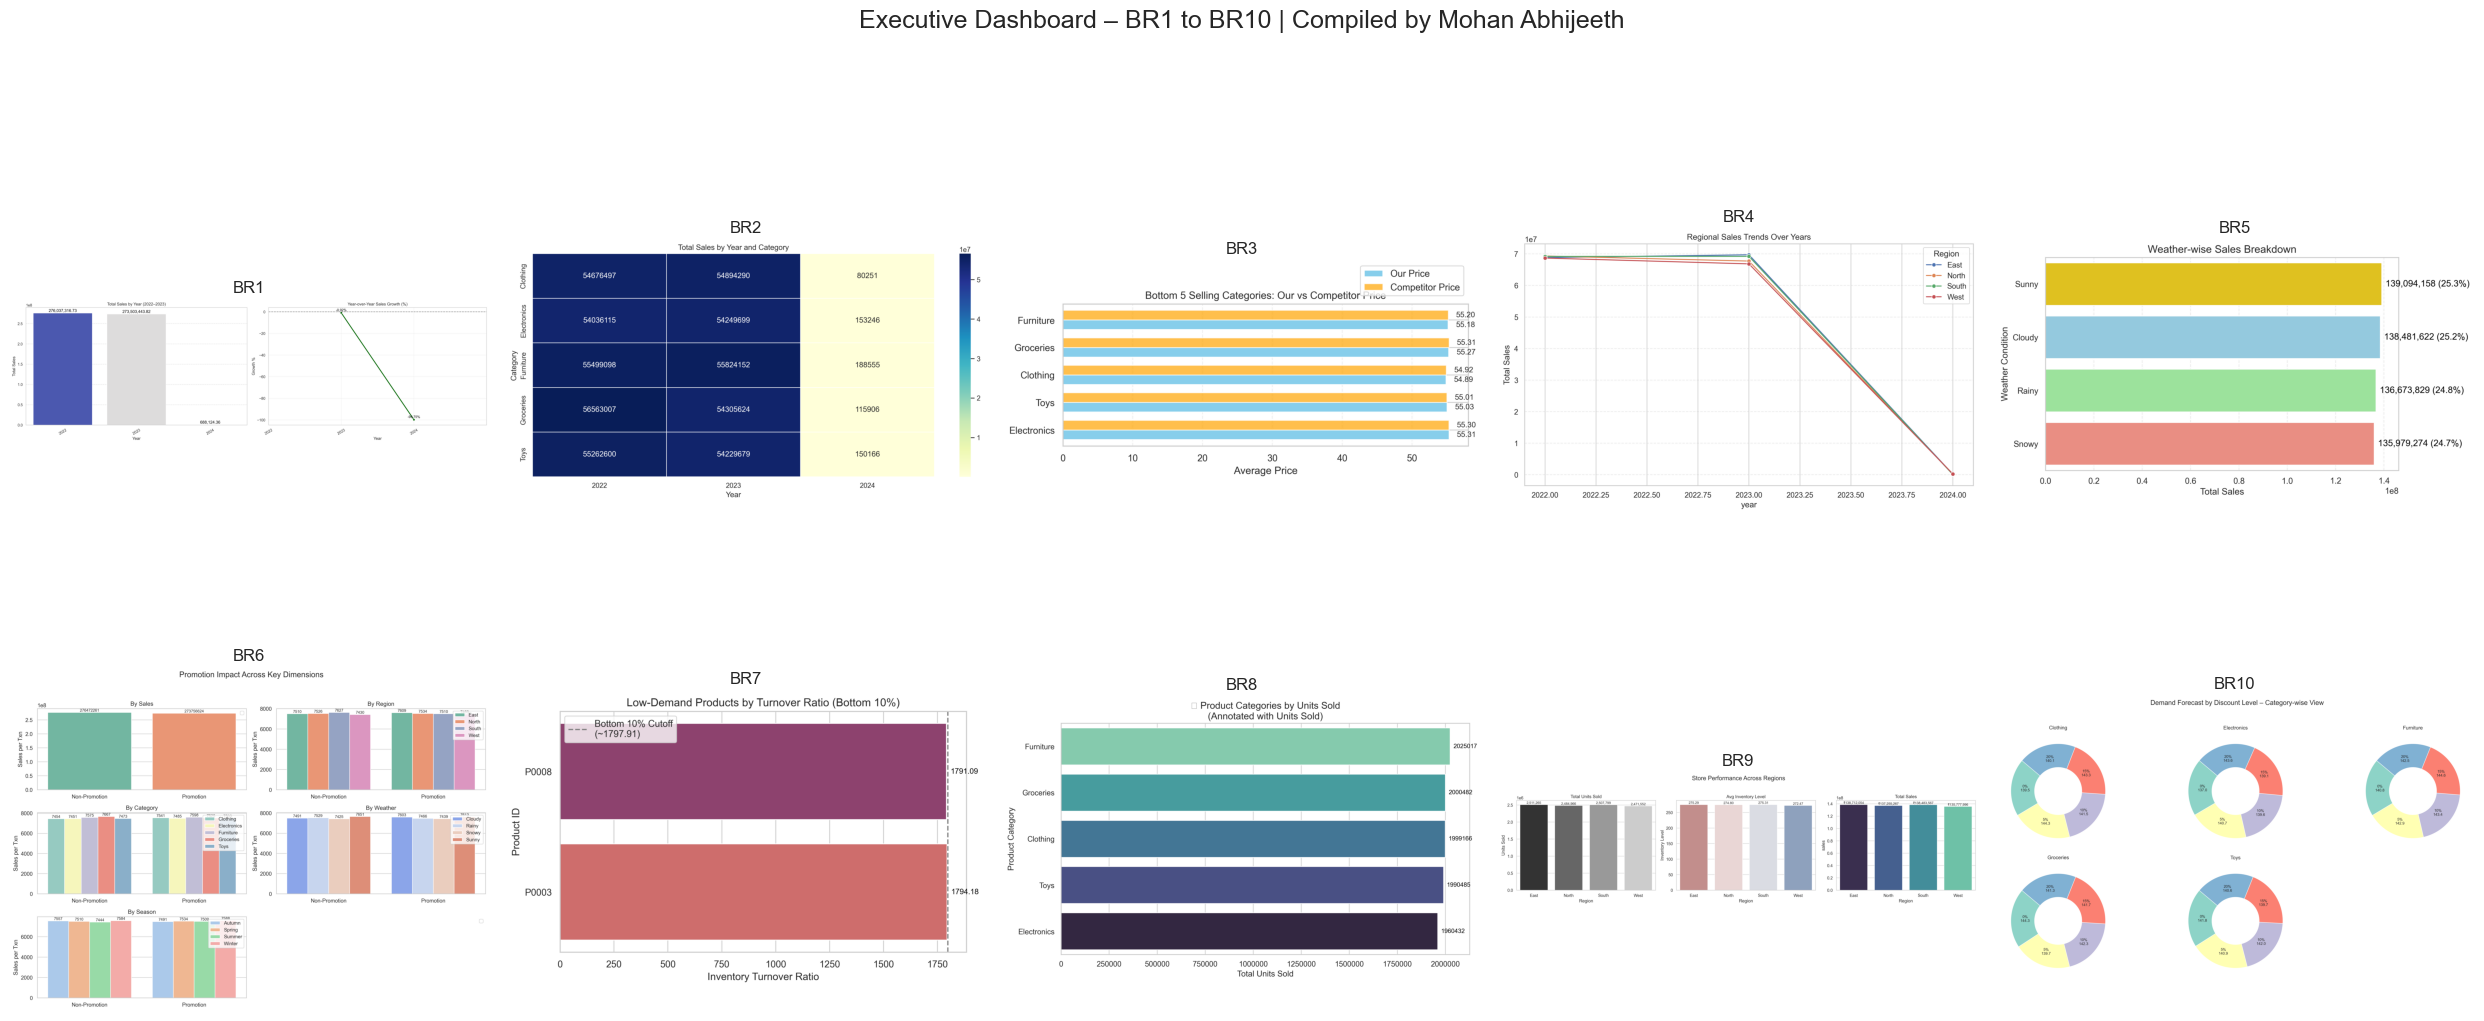

In [658]:
from matplotlib import image as mpimg
import matplotlib.gridspec as gridspec

# List of your saved visual files
image_files = [f'br{i}.png' for i in range(1, 11)]

# Set up a 2x5 grid (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
axes = axes.flatten()

# Loop through and embed each image
for i, (ax,img_path) in enumerate(zip(axes,image_files)):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"BR{i+1}", fontsize=12)

# Final touches
plt.suptitle("Executive Dashboard – BR1 to BR10 | Compiled by Mohan Abhijeeth", fontsize=18)
plt.tight_layout()
plt.savefig('final_dashboard.png', dpi=600, bbox_inches='tight')
plt.savefig(r'D:\Retail-Store-Inventory-Forecasting-Data-Analysis\final_dashboard.pdf')  # for reports
plt.show()
